# Linear Regerssion

## Model

$y_{predicted} = \beta_0 + \vec{\beta}.\vec{X} + \epsilon$

where 
* $\vec{X}$ is a vector of all Xs(or independent variables) 
* $\vec{\beta}$ is a vector of parameters to learn along with intercept $\beta_0$
* $\epsilon$ is the residual.


## Important Terms

1. Residual Sum of Sqares : $RSS = \sum_{i=1}^{n}(y_i - \hat{y_i})^2$
2. Explained Sum of Squares : $ESS = \sum_{i=1}^{n}(\hat{y_i} - \mu_{y})^2$
3. Total Sum of Squares : $TSS = \sum_{i=1}^{n}(y_i - \mu_{y})^2$
4. Coefficient of Determination : $R^2 = 1 - \frac{ESS}{TSS}$ 
    * Tells the amount of variance in IVs or Xs.

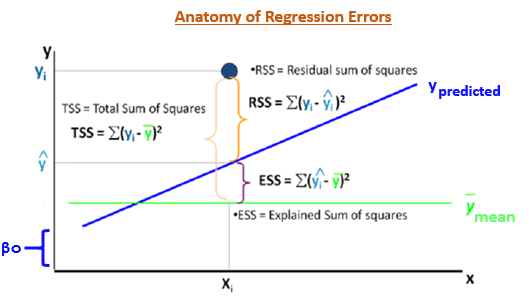



## Assumptions

1. Each x in Xs should variate **linearly** with y. 
2. Residuals i.e. $y_{predicted} - y_{actual}$ should follow a **normal distribution**.
3. Residuals should have a **constant variance**, else it creates problem of **heteroskedasticity**.
4. Xs should be **independent** of each other i.e. they should have as *low correlation* as possible in between them else it creates a problem of **multi-collilearity**.
5. Residual at a time or point should not be corellated to a residual at other time or point i.e. **autocorrelation** in residuals should be 0.


## Validation Metrics

In order for the regression model to perform very well, the above assumptions have to hold true. To make sure these assumptions below tests or metrics can be evaluated:

1. *Variance Inflation Factor :* $VIF=\frac{1}{1-R^2}$

    Checks the collinearity of one of the x in Xs to other Xs in an aggregated score. It follows:
    * VIF <= 4 implies no multicollinearity.
    * VIF >= 10 implies high multicollinearity.
2. *Durbin Watson Statistic (DW)* - Checks the autocorrelation of residuals. It lies in range (0,4) and follows:
    * 0 < DW < 2 implies +ve autocorrelation.
    * DW = 2 implies 0 or no autocorrelation.
    * 2 < DW < 4 implies -ve autocorrelation.
3. *Breusch-Pagan / Cook Weisberg Test* - A null hypothesis testing of presence of *heteroskedasticity* i.e. the variance in residuals is not constant. Here null hypothesis i.e. $H_0$ represents *no heterskedasticity*. It follows:
    * p-Value < 5% confidence => reject $H_0$.


## Validation Graphs



Graphically, presence of heteroskedasticity in residuals, linearity in Xs and nor distribution in residuals can be checked as:
1.   Residuals vs Fitted

    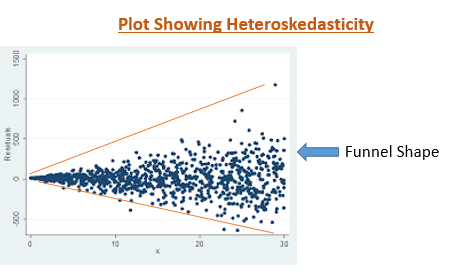
    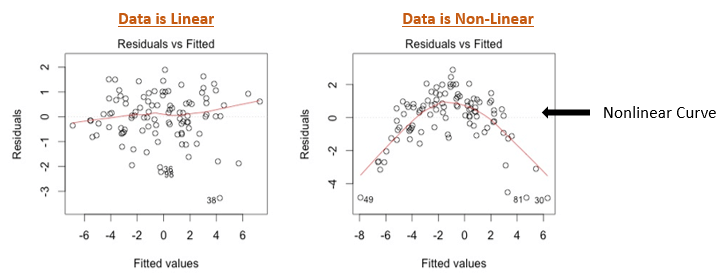
2. QQPlot of standardized residuals
    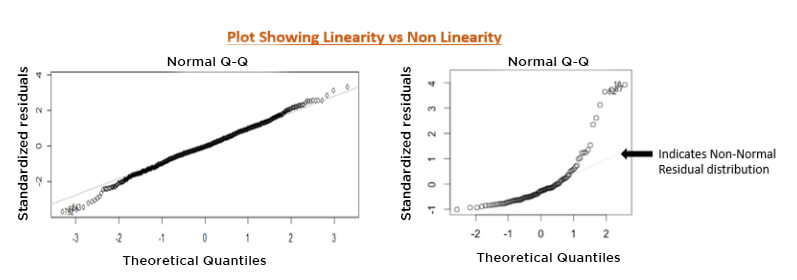



## Actions

A tree based model are best to handle all the problems discussed above and that is one of the reasons *Random Forest* is so famous. When assumptions are violated, a simple regression model fails to perform well. Hence following actions over the data can be taken to improve the model:

1. If Xs suffers non-linearity, transform IVs using sqrt, log, square, etc.
2. If residuals have heteroskedasticity:
    * Transform DV using sqrt, log, square, etc.
    * Weighted least square method can be used to tackle this problem.
3. If Xs suffers multicollinearity:
    * Use VIF to remove xs with higher value.
    * Use penalized regression methods such as lasso, ridge, elastic net, etc.
4. Do variable selection based on hypothesis testing. If p-value > 5% for an x, remove it from Xs taken.



## Accessing Fit

A model can be accessed using metrics as:
1. $R^2$ i.e. *Coefficient of Determination* - Explains the percentage of variance explained by Xs.
    * Ranges [0, 1].
    * Higher value is better, but when data is noisy a model with lower $R^2$ is considered.
    * Issue with $R^2$ is it $\uparrow$ with $\uparrow$ in no. of variables, regardless how qualitative new variables are. Better metric is *Adjusted* $R^2$ that overcomes it. Though if the new variable is truly useful, it $\uparrow$ as well. 
2. *F-Statistics* - Evaluates overall significance of model.
    * Compares full model with an intercept, (no predictors) model.
    * Value ranges [0,$\infty$)
    * Higher value, better the model.
3. *Error metrics* - Lower is better
    * MSE i.e. Mean Squared Error - Tends to amplify impact of outliers on the model's accuracy.
    * MAE i.e. Mean Absolute Error - Robust against effect of outliers.
    * RMSE i.e. Root Mean Squared Error - 
        * Interpreted as how far on an average, the residuals are from 0.
        * It nullifies squared effect of MSE by square root

# Solving Regression Problem

In [ ]:
import pandas
from matplotlib import pyplot
%matplotlib inline

raw_train = pandas.read_csv("/content/sample_data/predict_price/train.csv", encoding="utf-8")
raw_train.head()

In [ ]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [ ]:
raw_train.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


Observations:

1. Selling Price is for some items is negative.
2. The are outliers in *charges_1*, *Minimum_price*, *Maximum_price* and *Selling_Price*
3. Most of the values of *Discount_avail* are 0.



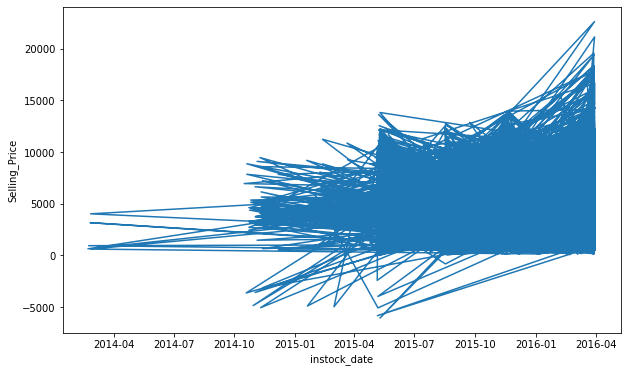

In [ ]:
pyplot.figure(figsize=(10,6))
pyplot.xlabel("instock_date")
pyplot.ylabel("Selling_Price")
pyplot.plot(pandas.to_datetime(raw_train["instock_date"]), raw_train["Selling_Price"])

Clearly the target variable *Selling_Price* has no particular variation with *instock_date* and so  not a time series. Similarly, *Customer_name* and *Product_id* also won't have any relation with *Selling_Price*. Hence these are the variable that can be removed right away.

This way checking on other columns independently with target variable, there may be no particular relation but may be in combination of other variables, which is the pattern our model has to find.

Hence, we should transform *Product_Category* and *Loyalty_customer*, the string based categorical variables to numberical categories.

In [ ]:
from sklearn import preprocessing

# Label Encoding
encoder = preprocessing.LabelEncoder()
for col in ["Product_Category", "Loyalty_customer"]:
    raw_train[col+"_e"] = encoder.fit_transform(raw_train[col])
raw_train.drop(labels=["instock_date", "Customer_name", "Product_id", "Product_Category", "Loyalty_customer"], axis="columns", inplace=True)

raw_train.head()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Product_Category_e,Loyalty_customer_e
0,37.0,2,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,3,1
1,38.0,24,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,3,1
2,9.0,447,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,0,1
3,50.0,23,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2,1
4,7.0,63,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,8,1


In [ ]:
raw_train.isnull().sum()

Stall_no                5
Market_Category         0
Grade                   0
Demand                  0
Discount_avail         38
charges_1             198
charges_2 (%)         205
Minimum_price          38
Maximum_price         343
Selling_Price          41
Product_Category_e      0
Loyalty_customer_e      0
dtype: int64

In [ ]:
null_categorical = ["Stall_no", "Discount_avail"]
null_continuous = ["charges_1", "charges_2 (%)", "Minimum_price", "Maximum_price", "Selling_Price"]

print("Null samples : Total = {} %".format(round((len(raw_train) - len(raw_train.dropna()))*100.0/len(raw_train),2)))
print("Null samples : Categorical = {} %".format(round((len(raw_train) - len(raw_train[null_categorical].dropna()))*100.0/len(raw_train),2)))
print("Null samples : Continuous = {} %".format(round((len(raw_train) - len(raw_train[null_continuous].dropna()))*100.0/len(raw_train),2)))

Null samples : Total = 12.53 %
Null samples : Categorical = 0.68 %
Null samples : Continuous = 11.95 %


There are overall 12.53 % samples with nulls, mostly in continuous. Due to this proportion, it is better to impute these than to remove them. Strategy:
1. For continuous columns, impute by mean.
2. For categorical columns, remove due to being very low in proportion.



In [ ]:
# Null Treatment

for col in null_continuous:
    raw_train[col] = raw_train[col].fillna(value=raw_train[col].mean())
raw_train = raw_train.dropna(subset=null_categorical)
raw_train.reset_index(inplace=True, drop=True)

raw_train.isnull().sum()

Stall_no              0
Market_Category       0
Grade                 0
Demand                0
Discount_avail        0
charges_1             0
charges_2 (%)         0
Minimum_price         0
Maximum_price         0
Selling_Price         0
Product_Category_e    0
Loyalty_customer_e    0
dtype: int64

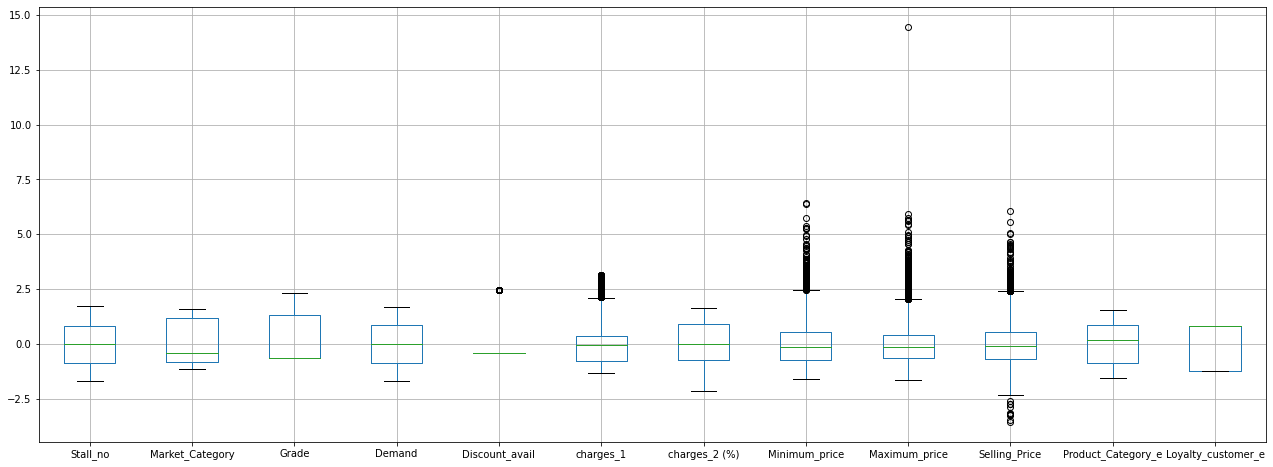

In [ ]:
standard_train = (raw_train-raw_train.mean())/raw_train.std()
standard_train.boxplot(figsize=(22,8))

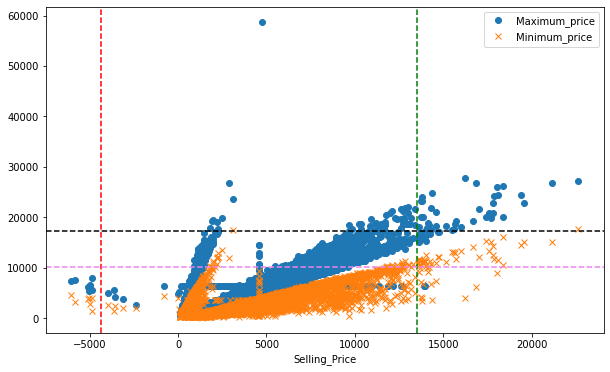

In [ ]:
ax = raw_train.plot.line(x="Selling_Price", y=["Maximum_price", "Minimum_price"], figsize=(10,6), style=["o", "x"])
ax.axvline(raw_train["Selling_Price"].mean() + 3*raw_train["Selling_Price"].std(), color="green", linestyle="dashed")
ax.axvline(raw_train["Selling_Price"].mean() - 3*raw_train["Selling_Price"].std(), color="red", linestyle="dashed")
ax.axhline(raw_train["Maximum_price"].mean() + 3*raw_train["Maximum_price"].std(), color="black", linestyle="dashed")
ax.axhline(raw_train["Minimum_price"].mean() + 3*raw_train["Minimum_price"].std(), color="violet", linestyle="dashed")
pyplot.show()

Observations:
1. Beyond upper critical outlier limit for *Selling_Price*, values are dispersed.
2. Beyond upper critical outlier limit for *Maximum_price*, values are dispersed.
3. Beyond upper critical outlier limit for *Minumum_price*, values are not much dispersed.
4. There is good correlation between:
    *   *Maximum_price* and *Selling_Price*
    *   *Minimum_price* and *Selling_Price*
4. There are items for which *Selling_Price* is negative.



In [ ]:
# Filtering positive Selling_Price

raw_train = raw_train[raw_train["Selling_Price"] >= 0]
raw_train.reset_index(drop=True, inplace=True)

In [ ]:
raw_train.corr()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Product_Category_e,Loyalty_customer_e
Stall_no,1.000000,-0.005247,-0.001771,0.004995,-0.019953,-0.009292,-0.002861,-0.000010,0.008033,0.010369,-0.011422,0.007676
Market_Category,-0.005247,1.000000,-0.036191,-0.020096,-0.002516,0.017967,0.024502,0.194917,0.130394,0.140714,-0.002602,0.034456
Grade,-0.001771,-0.036191,1.000000,0.009983,-0.025499,-0.025479,-0.017049,-0.078625,0.160987,0.086235,0.009538,0.025241
Demand,0.004995,-0.020096,0.009983,1.000000,0.010712,-0.006162,0.019028,0.009223,0.002734,-0.002638,-0.023671,0.006513
Discount_avail,-0.019953,-0.002516,-0.025499,0.010712,1.000000,-0.004189,0.018926,0.009522,-0.004054,-0.517311,-0.027986,-0.021361
charges_1,-0.009292,0.017967,-0.025479,-0.006162,-0.004189,1.000000,0.263716,0.020253,0.011946,0.052942,0.208029,0.007860
charges_2 (%),-0.002861,0.024502,-0.017049,0.019028,0.018926,0.263716,1.000000,0.006706,0.010966,0.010462,-0.469667,0.012602
Minimum_price,-0.000010,0.194917,-0.078625,0.009223,0.009522,0.020253,0.006706,1.000000,0.689873,0.701255,0.001561,0.091127
Maximum_price,0.008033,0.130394,0.160987,0.002734,-0.004054,0.011946,0.010966,0.689873,1.000000,0.754431,-0.011477,0.114291
Selling_Price,0.010369,0.140714,0.086235,-0.002638,-0.517311,0.052942,0.010462,0.701255,0.754431,1.000000,0.015342,0.096551


Number of samples before Outlier treatment = 6311
Number of samples after Outlier treatment= 6098


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


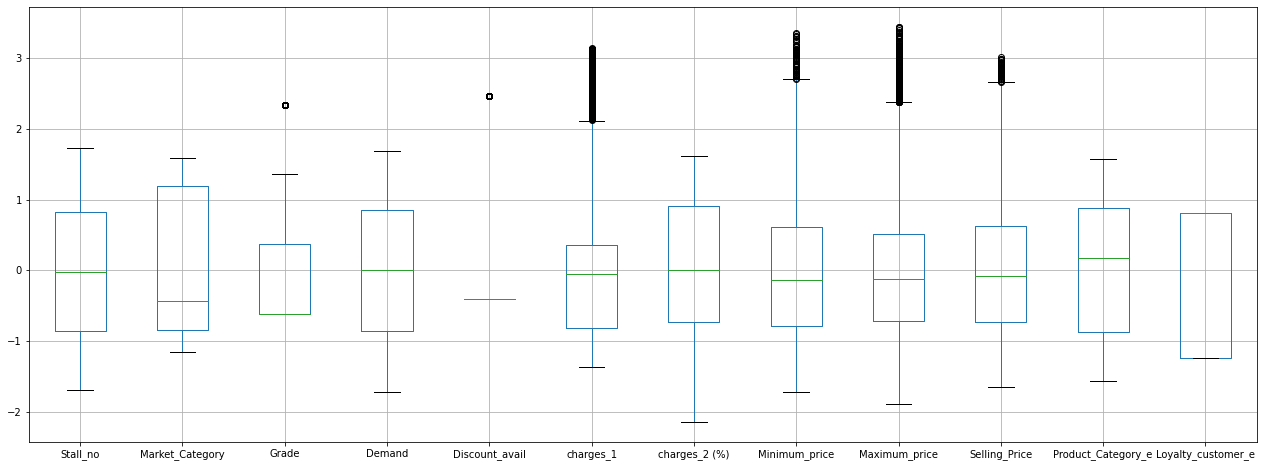

In [ ]:
# Outlier treatment
from scipy.stats import stats

print("Number of samples before Outlier treatment = {}".format(len(raw_train)))
for outlier_col in ["charges_1", "Minimum_price", "Maximum_price", "Selling_Price", "Discount_avail"]:
    raw_train["z_score"] = stats.zscore(raw_train[outlier_col])
    raw_train = raw_train[raw_train["z_score"].abs() < 3]
raw_train.drop(labels="z_score", axis="columns", inplace=True)
raw_train.reset_index(inplace=True, drop=True)
print("Number of samples after Outlier treatment= {}".format(len(raw_train)))

standard_train = pandas.DataFrame(index=range(len(raw_train)), data=stats.zscore(raw_train), columns=raw_train.columns)
standard_train.boxplot(figsize=(22,8))

In [ ]:
# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_VIF(iv_df: pandas.DataFrame):
    return pandas.DataFrame(index=iv_df.columns, columns=["VIF"], 
                            data=[variance_inflation_factor(iv_df.values, idx_col) for idx_col in range(len(iv_df.columns))])

In [ ]:
calculate_VIF(iv_df = raw_train.drop("Selling_Price", axis="columns"))

,VIF
Stall_no,3.661617
Market_Category,2.424422
Grade,1.531432
Demand,3.663334
Discount_avail,1.158452
charges_1,7.254349
charges_2 (%),7.236178
Minimum_price,8.665893
Maximum_price,10.662669
Product_Category_e,3.840453


VIF of just *Maximum_price* >= 10, suggesting high *multicollinearity* and so has to be removed.

In [ ]:
mod_train = raw_train.drop(labels="Maximum_price", axis="columns")
mod_train.head()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Selling_Price,Product_Category_e,Loyalty_customer_e
0,37.0,2,1,68,0.0,376.0,11.0,2983.0,4185.947700,3,1
1,38.0,24,0,51,0.0,397.0,12.0,7495.0,9271.490256,3,1
2,9.0,447,0,10,0.0,250.0,9.0,5752.0,6785.701362,0,1
3,7.0,63,1,35,1.0,211.0,4.0,2430.0,906.553935,8,1
4,33.0,462,3,57,0.0,263.0,13.0,2006.0,3874.264992,1,0


Creating Validation set from Training set

In [ ]:
from sklearn.model_selection import train_test_split

validation_set_ratio = 0.25
X_train, X_valid, y_train, y_valid = train_test_split(raw_train.drop(labels=["Selling_Price"], axis="columns"), raw_train["Selling_Price"], test_size=validation_set_ratio)

## Linear Regression

In [ ]:
# Using a general regression model
from statsmodels.regression.linear_model import OLS

model_OLS = OLS(y_train, X_train)
results_OLS = model_OLS.fit()
print(results_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          1.714e+04
Date:                Fri, 18 Jun 2021   Prob (F-statistic):                        0.00
Time:                        18:41:18   Log-Likelihood:                         -37002.
No. Observations:                4573   AIC:                                  7.403e+04
Df Residuals:                    4562   BIC:                                  7.410e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [ ]:
from sklearn.metrics import mean_squared_error

print("Train RMSE - {}".format(round(mean_squared_error(results_OLS.predict(X_train), y_train, squared=False))))
print("Valid RMSE - {}".format(round(mean_squared_error(results_OLS.predict(X_valid), y_valid, squared=False))))

Train RMSE - 790
Valid RMSE - 819


Observations:
1. Coefficient of determination is *0.945*, suggesting good fit of the model.
2. Durbin-Watson statistic is *1.981*, very close to 2, implying 0 or no auocorrelation in residuals.
3. F-statistic value is very high, suggesting good fit of the model.
4. Probability of Omnibus is 0, indicating that there is 0 chance that the residuals have a normal distribution. The same is confirmed by Probability of Jarque-Bera.
5. High value of Kurtosis, indicating there are extremes in residuals.
6. Condition Number is large as indicated in the warning in report.



In [ ]:
# Breusch-Pagan Test for Heteroskedaticity
from statsmodels.stats.diagnostic import het_breuschpagan

def test_heteroskedasticity(model_fit, iv_df: pandas.DataFrame):
    stat_labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
    bp_test = het_breuschpagan(model_fit.resid, iv_df)
    return dict(zip(stat_labels, bp_test))

In [ ]:
test_heteroskedasticity(results_OLS, X_train)

{'F-Statistic': 117.47223134618952,
 'F-Test p-value': 2.4327041452261607e-237,
 'LM Statistic': 1009.3968705990604,
 'LM-Test p-value': 1.7685605702254884e-210}

*p-value* in both the cases *LM-Test* and *F-Test* is < 5% significance, hence we'll reject H0 i.e. the model is heteroskedistic or there a good amount of variation in the residuals.

In [ ]:
# Residuals vd Fitted values

def resudials_vs_fitted(model_fit):
    pyplot.figure(figsize=(10,6))
    pyplot.xlabel("Residuals")
    pyplot.ylabel("Fitted Values")
    pyplot.scatter(model_fit.resid, model_fit.fittedvalues)

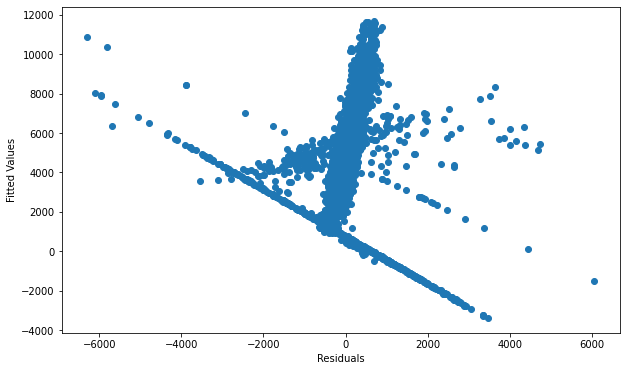

In [ ]:
resudials_vs_fitted(results_OLS)

As clearly visible the amount of variation in the residuals as also implied by the p-value above. Hence, we can do the following:
1. Use weighted least squares method.
2. Transform DV.

In [ ]:
# Normal QQ plot: Standardized residuals vs Theoretical quantiles
from scipy.stats import probplot

def resuduals_vs_theoritical_quantiles(model_fit):
    qq_data = pandas.DataFrame(columns=["stud_residuals"], index=model_fit.resid.index, data=pandas.Series(model_fit.get_influence().resid_studentized_internal))
    qq_data.sort_values(by="stud_residuals", ascending=True, inplace=True)
    qq_data["th_quantiles"] = probplot(qq_data["stud_residuals"], dist="norm", fit=False)[0]

    pyplot.figure(figsize=(10,6))
    pyplot.xlabel("Theretical Quiantiles")
    pyplot.ylabel("Studentized Residuals")
    pyplot.scatter(qq_data["th_quantiles"], qq_data["stud_residuals"])

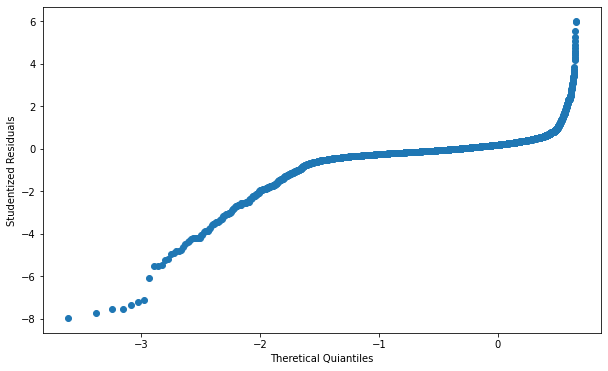

In [ ]:
resuduals_vs_theoritical_quantiles(results_OLS)

As per the plot, the residuals are partially linear. Hence following can be done:
1. Transform large scale IDVs.
2. Remove some discrete variables.



In [ ]:
# Transformations
import numpy
trans_train = raw_train

# Square root of DV, large scale IDV
trans_train["Minimum_price"] = numpy.log(trans_train["Minimum_price"])
trans_train["Maximum_price"] = numpy.log(trans_train["Maximum_price"])

# Updating Split Sets
X_train, X_valid, y_train, y_valid = train_test_split(trans_train.drop(labels=["Selling_Price"], axis="columns"), trans_train["Selling_Price"], test_size=validation_set_ratio)

In [ ]:
# Checking the results
calculate_VIF(iv_df = X_train)

,VIF
Stall_no,4.050864
Market_Category,2.431062
Grade,1.513855
Demand,4.075196
Discount_avail,1.168894
charges_1,7.399904
charges_2 (%),10.006137
Minimum_price,297.562463
Maximum_price,318.219487
Product_Category_e,5.081496


In [ ]:
# Feature Selection
from sklearn.feature_selection import f_regression

# Null Hypothesis - f_i is not related to target feature
pandas.DataFrame(
    data=f_regression(raw_train.drop(labels=["Selling_Price"], axis="columns"), raw_train["Selling_Price"]), 
    columns=raw_train.drop(labels=["Selling_Price"], axis="columns").columns,
    index=["Correration", "pValue"]
)

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Product_Category_e,Loyalty_customer_e
Correration,0.260189,1.491911e+02,9.336578,0.231028,2704.998202,14.471059,0.733211,4027.407796,5637.594459,2.614887,4.109818e+01
pValue,0.610009,6.472537e-34,0.002256,0.630780,0.000000,0.000144,0.391878,0.000000,0.000000,0.105917,1.556233e-10


Here H0(Null Hypothesis) is, a feature $f_i$ is *not* related to target variable $y$. And is rejected when *pValue* is less than 5% confidence.

In [ ]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(f_regression, k=8)
selector_fit = selector.fit(raw_train.drop(labels=["Selling_Price"], axis="columns"), raw_train["Selling_Price"])
X_filtered = selector_fit.transform(raw_train.drop(labels=["Selling_Price"], axis="columns"))

In [ ]:
from sklearn.metrics import r2_score
X_train, X_valid, y_train, y_valid = train_test_split(X_filtered, raw_train["Selling_Price"], test_size=validation_set_ratio)

In [ ]:
from statsmodels.regression.linear_model import WLS

model_WLS = WLS(y_train, X_train)
results_WLS = model_WLS.fit()
print(results_WLS.summary())

                                 WLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.871
Model:                            WLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              3850.
Date:                Fri, 18 Jun 2021   Prob (F-statistic):                        0.00
Time:                        18:43:16   Log-Likelihood:                         -40848.
No. Observations:                4573   AIC:                                  8.171e+04
Df Residuals:                    4565   BIC:                                  8.176e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Checking residual parameters

test_heteroskedasticity(results_WLS, X_train)

{'F-Statistic': 331.5833385335817,
 'F-Test p-value': 0.0,
 'LM Statistic': 1680.6878659297922,
 'LM-Test p-value': 0.0}

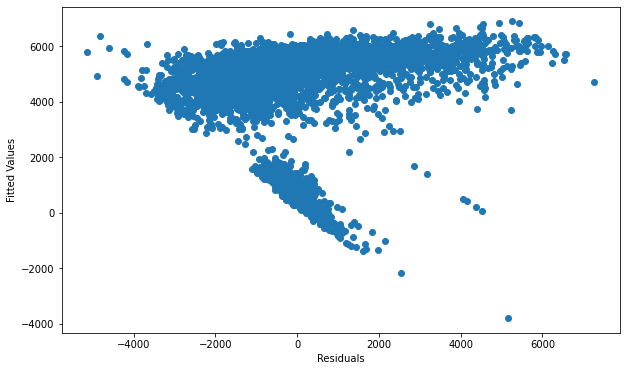

In [ ]:
resudials_vs_fitted(results_WLS)

In [ ]:
def get_metrics(pred, actual):
    return {
        "RMSE": round(mean_squared_error(pred, actual, squared=False)),
        "Correlation": round(numpy.corrcoef(pred, actual)[0,1],4),
        "R Square": round(r2_score(actual, pred),4)
    }

In [ ]:
def plot_results(x_value, y_value, x_label, y_label):
    pyplot.figure(figsize=(10,6))
    pyplot.scatter(x_value, y_value, c="green")
    pyplot.scatter(x_value, x_value, c="blue")
    pyplot.legend([y_label, x_label])
    pyplot.show()

Train:
{'RMSE': 1833, 'Correlation': 0.7247, 'R Square': 0.5146}


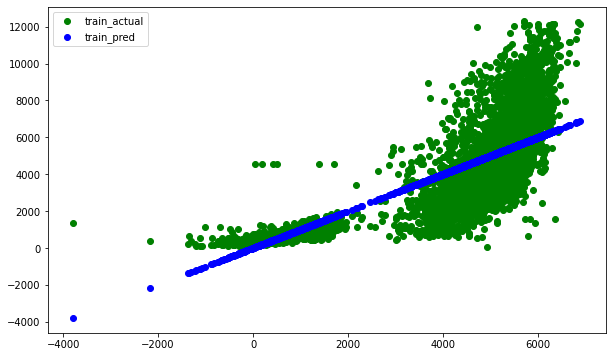

In [ ]:
print("Train:\n{}".format(get_metrics(results_WLS.predict(X_train), y_train)))
plot_results(results_WLS.predict(X_train), y_train, "train_pred", "train_actual")

Validation:
{'RMSE': 1888, 'Correlation': 0.7195, 'R Square': 0.5049}


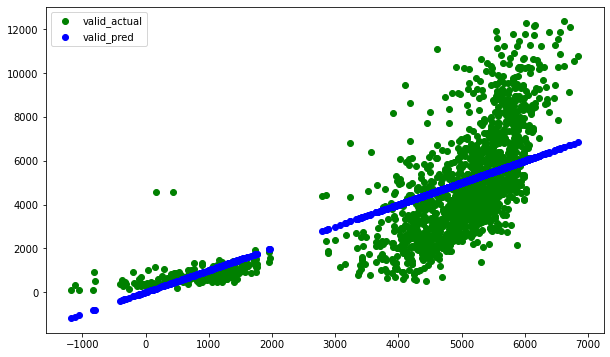

In [ ]:
print("Validation:\n{}".format(get_metrics(results_WLS.predict(X_valid), y_valid)))
plot_results(results_WLS.predict(X_valid), y_valid, "valid_pred", "valid_actual")

All the analysis suggests that the training data does not fits well with the assumptions of a regression problem, even after transformation. Hence a model that could imply the non-linearity and other violations in assumptions can be used.

## Polynomial Regression

In [ ]:
# Polynomial Regression model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

stages = [
    ("standardizer", StandardScaler()),
    ("polynomial", PolynomialFeatures(degree = 3)),
    ("model", LinearRegression())
]
pipe_polynomial = Pipeline(stages)
pipe_polynomial.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Train:
{'RMSE': 429, 'Correlation': 0.9866, 'R Square': 0.9733}


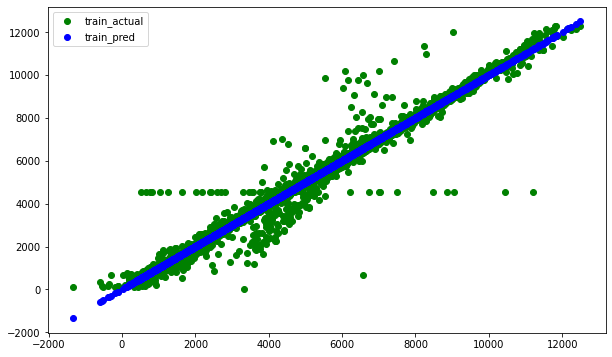

In [ ]:
print("Train:\n{}".format(get_metrics(pipe_polynomial.predict(X_train), y_train)))
plot_results(pipe_polynomial.predict(X_train), y_train, "train_pred", "train_actual")

Validation:
{'RMSE': 397, 'Correlation': 0.989, 'R Square': 0.9781}


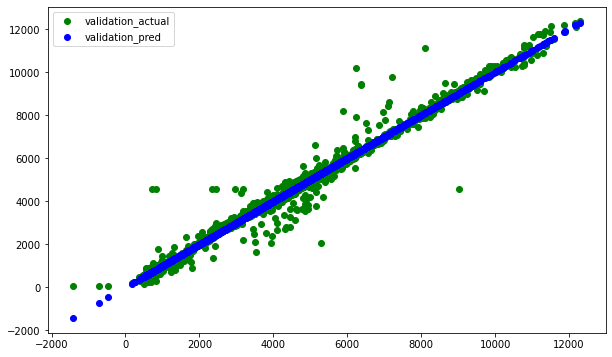

In [ ]:
print("Validation:\n{}".format(get_metrics(pipe_polynomial.predict(X_valid), y_valid)))
plot_results(pipe_polynomial.predict(X_valid), y_valid, "validation_pred", "validation_actual")

Creating a polynomial model to justify the presence of non-linearity in the dataset and its behaviour using *degree*, it can be clearly seen how well the polynomial regressive model is performing.

## Penalising Regression

When there is high multicollinearity in the dataset used for training, the model tends to get biased to the training set. To avoid this bias(or overfitting) the model should inculcate a penalty(or regularization) for the same. 

*Regularization* is a general technique with different methods to achieve to make a model more general that is less likely to overfit.

A general objective function for a regressive model:

$J(\beta_i) = \frac{1}{m}\times[\sum_{i=1}^{m} (y_i - \hat{y_i})^2] + \lambda\times L_i$

where:
* *m* is the number of samples and *n* is the number of IDVs or features.
* $\lambda$ is the *regularization parameter* and helps generalizing the model.
* *i* is for 1 or 2 representing L1(*Lasso Regression*) or L2(*Ridge Regression*) regularization:
    * $L2 = \sum_{j=1}^{n} \beta_j^2$
    * $L1 = \sum_{j=1}^{n} |\beta_j|$

In [ ]:
from sklearn.linear_model import Ridge

stages = [
    ("standardizer", StandardScaler()),
    ("estimator", Ridge())
]

pipe_penalizing = Pipeline(stages)
pipe_penalizing.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

Train:
{'RMSE': 1073, 'Correlation': 0.913, 'R Square': 0.8336}


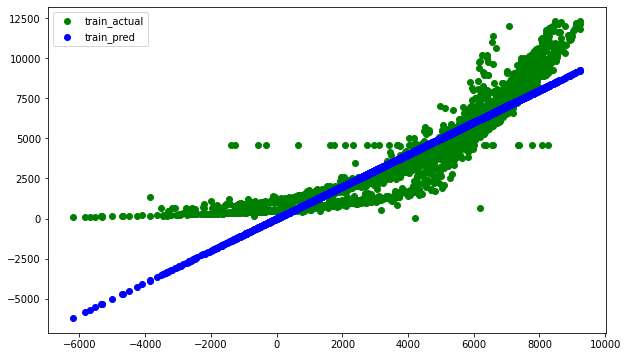

In [ ]:
print("Train:\n{}".format(get_metrics(pipe_penalizing.predict(X_train), y_train)))
plot_results(pipe_penalizing.predict(X_train), y_train, "train_pred", "train_actual")

Validation:
{'RMSE': 1090, 'Correlation': 0.914, 'R Square': 0.835}


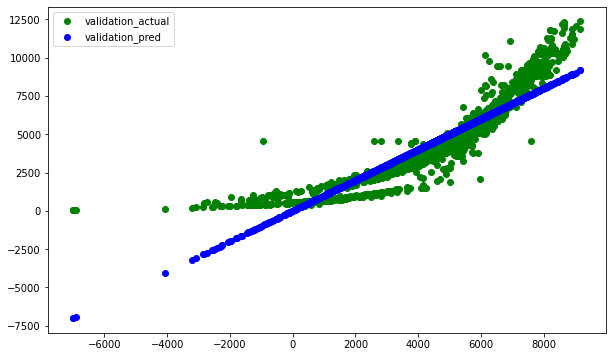

In [ ]:
print("Validation:\n{}".format(get_metrics(pipe_penalizing.predict(X_valid), y_valid)))
plot_results(pipe_penalizing.predict(X_valid), y_valid, "validation_pred", "validation_actual")

As good as a linear model, but with an improved R square value.

## KNN Regressor

* KNN stands for K-Nearest Neighbours.
* Views the whole training set to give a predicted value by averaging the output of k nearest neighbours of the query point.
* Hence less time in training but good amount of time in querying.
* Hence takes a lot of space to store the training set.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

stages = [
    ("standardizer", StandardScaler()),
    ("estimator", KNeighborsRegressor())
]

pipe_knn = Pipeline(stages)
pipe_knn.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=5, p=2,
                                     weights='uniform'))],
         verbose=False)

Train:
{'RMSE': 509, 'Correlation': 0.982, 'R Square': 0.9626}


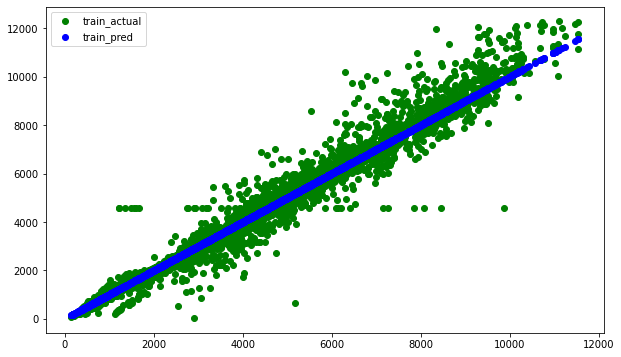

In [ ]:
print("Train:\n{}".format(get_metrics(pipe_knn.predict(X_train), y_train)))
plot_results(pipe_knn.predict(X_train), y_train, "train_pred", "train_actual")

Validation:
{'RMSE': 625, 'Correlation': 0.9743, 'R Square': 0.9458}


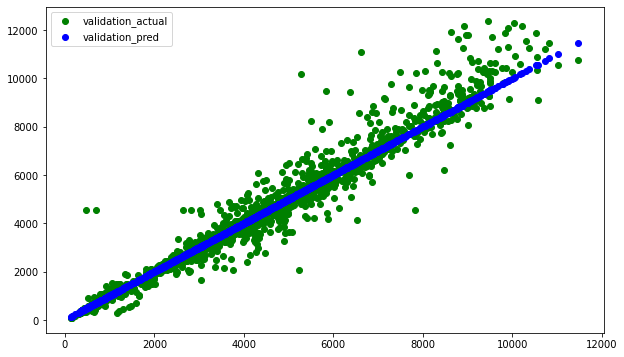

In [ ]:
print("Validation:\n{}".format(get_metrics(pipe_knn.predict(X_valid), y_valid)))
plot_results(pipe_knn.predict(X_valid), y_valid, "validation_pred", "validation_actual")

## Tree Regressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor

stages = [
    ("standardizer", StandardScaler()),
    ("estimator", DecisionTreeRegressor(max_features="auto"))
]

pipe_tree = Pipeline(stages)
pipe_tree.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))],
         verbose=False)

Train:
{'RMSE': 0, 'Correlation': 1.0, 'R Square': 1.0}


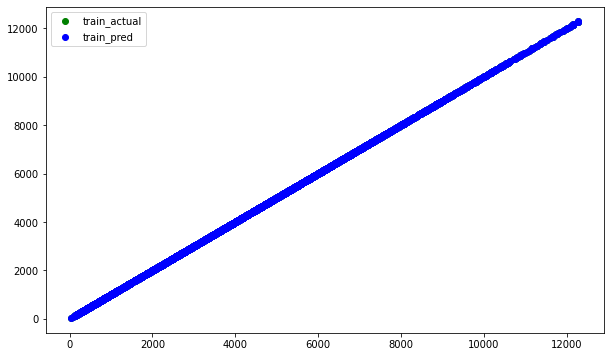

In [ ]:
print("Train:\n{}".format(get_metrics(pipe_tree.predict(X_train), y_train)))
plot_results(pipe_tree.predict(X_train), y_train, "train_pred", "train_actual")

Validation:
{'RMSE': 466, 'Correlation': 0.985, 'R Square': 0.9699}


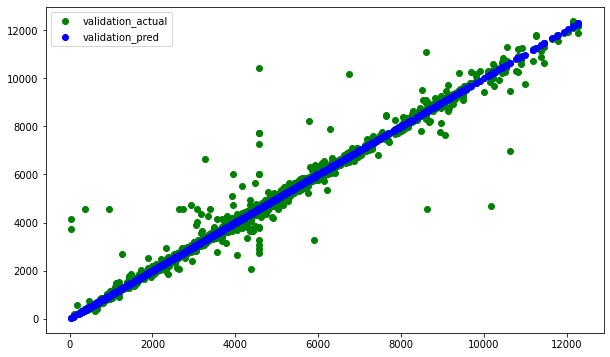

In [ ]:
print("Validation:\n{}".format(get_metrics(pipe_tree.predict(X_valid), y_valid)))
plot_results(pipe_tree.predict(X_valid), y_valid, "validation_pred", "validation_actual")

This demonstrates how well a decision tree *Overfits*. This is due to the fact that a decision tree keeps splitting to the maximum possible depth and that is why each decision it makes in the training set matches perfectly with the trained value. To induce regularization in a tree model ensemble learning with *Bagging* or *Boosting* is used. 

## Deep Learning Regressor

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model_ANN = Sequential([
    Dense(30, input_dim=8, kernel_initializer="glorot_normal", activation="relu"),
    Dense(60, kernel_initializer="glorot_normal", activation="relu"),
    Dense(15, kernel_initializer="glorot_uniform", activation="linear"),
    Dense(1, kernel_initializer="glorot_uniform", activation="linear")
])
model_ANN.compile(loss="mean_squared_error", optimizer="adam")

standardizer = StandardScaler()
X_train_std = standardizer.fit_transform(X_train)
X_valid_std = standardizer.fit_transform(X_valid)

model_ANN.fit(X_train_std, y_train, epochs=50)

Epoch 1/50
143/143 [==============================] - 1s 1ms/step - loss: 25822351.6389
Epoch 2/50
143/143 [==============================] - 0s 1ms/step - loss: 19016482.2917
Epoch 3/50
143/143 [==============================] - 0s 1ms/step - loss: 913728.6892
Epoch 4/50
143/143 [==============================] - 0s 2ms/step - loss: 406881.6936
Epoch 5/50
143/143 [==============================] - 0s 1ms/step - loss: 364417.8320
Epoch 6/50
143/143 [==============================] - 0s 1ms/step - loss: 324336.8783
Epoch 7/50
143/143 [==============================] - 0s 1ms/step - loss: 349663.3647
Epoch 8/50
143/143 [==============================] - 0s 1ms/step - loss: 311066.3838
Epoch 9/50
143/143 [==============================] - 0s 2ms/step - loss: 316399.1664
Epoch 10/50
143/143 [==============================] - 0s 2ms/step - loss: 272798.0551
Epoch 11/50
143/143 [==============================] - 0s 1ms/step - loss: 263810.7748
Epoch 12/50
143/143 [===========================

Train:
{'RMSE': 464, 'Correlation': 0.9843, 'R Square': 0.9688}


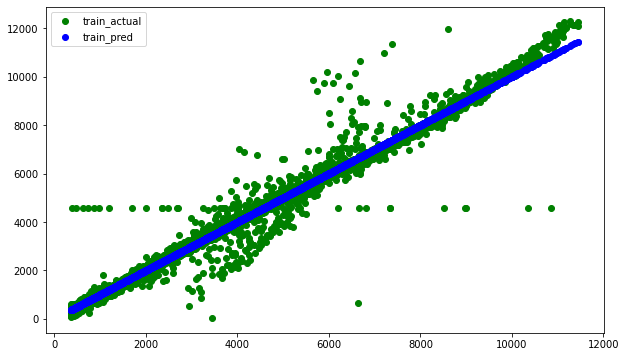

In [ ]:
print("Train:\n{}".format(get_metrics(model_ANN.predict(X_train_std).reshape((len(y_train))), y_train)))
plot_results(model_ANN.predict([X_train_std]).reshape((len(y_train))), y_train, "train_pred", "train_actual")

Validation:
{'RMSE': 438, 'Correlation': 0.9882, 'R Square': 0.9734}


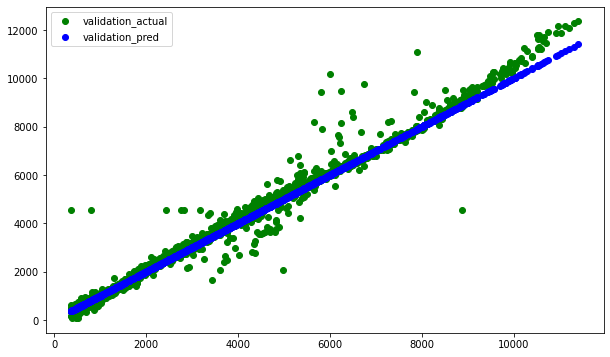

In [ ]:
print("Validation:\n{}".format(get_metrics(model_ANN.predict(X_valid_std).reshape((len(y_valid))), y_valid)))
plot_results(model_ANN.predict(X_valid_std).reshape((len(y_valid))), y_valid, "validation_pred", "validation_actual")

# Conclusion

When the data in non-linear, models that are capable to capture the non-linearity should be used. Feasible models:
* Polynomial regressor, KNN regressor, Tree regressor or Deep ANN regressors. But Tree regressors are prone to overfitting.
* Ensembled Learning:
    * Boosting of Stumps i.e. single node decision tree which is a very weak learner.
    * Bagging of:
        * Stumps
        * KNN and any parameterized model i.e. polynomial regressor, Deep ANN regressor.

# Using Best Model

Comparing above results, the Deep ANN performed the best.

In [ ]:
raw_test = pandas.read_csv("/content/sample_data/predict_price/test.csv", encoding="utf-8")
raw_test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [ ]:
sumbission = pandas.read_csv("/content/sample_data/predict_price/sample_submission.csv", encoding="utf-8")
sumbission.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3294.594688
1,ACCEGCATKHNRXUHW,1945.603968
2,NKCE6GJ5XVJDXNNZ,11871.830880
3,NKCEB8BK3ZXDHDHM,9421.143424
4,TOPEFDXSAHRNPF94,5717.420625


In [ ]:
raw_test.isnull().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

In [ ]:
# Label Encoding

encoder = preprocessing.LabelEncoder()
for col in ["Product_Category", "Loyalty_customer"]:
    raw_test[col+"_e"] = encoder.fit_transform(raw_test[col])

trans_test = raw_test.drop(labels=["instock_date", "Customer_name", "Product_id", "Product_Category", "Loyalty_customer"], axis="columns")
trans_test.head()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Product_Category_e,Loyalty_customer_e
0,39.0,205,0,90,0,380.0,16.0,2576.0,3340,3,0
1,49.0,3,0,87,0,393.0,16.0,1202.0,1955,3,1
2,1.0,183,2,55,0,493.0,9.0,7175.0,15715,9,0
3,8.0,358,3,86,0,303.0,16.0,5404.0,13078,0,1
4,33.0,167,0,27,0,567.0,16.0,4069.0,6244,9,0


In [ ]:
# Null Treatment

for col in ["charges_1", "charges_2 (%)", "Minimum_price"]:
    trans_test[col] = trans_test[col].fillna(value=trans_test[col].mean())
trans_test["Stall_no"] = trans_test["Stall_no"].fillna(value=trans_test["Stall_no"].value_counts().index[0])
trans_test.reset_index(inplace=True, drop=True)

trans_test.isnull().sum()

Stall_no              0
Market_Category       0
Grade                 0
Demand                0
Discount_avail        0
charges_1             0
charges_2 (%)         0
Minimum_price         0
Maximum_price         0
Product_Category_e    0
Loyalty_customer_e    0
dtype: int64

We can't remove outliers since it is real time data.

In [ ]:
X_test_std = standardizer.fit_transform(selector_fit.transform(trans_test))

In [ ]:
predicted = pandas.DataFrame(index = range(len(raw_test)), data = raw_test["Product_id"], columns = ["Product_id"])
predicted["Selling_Price"] = model_ANN.predict(X_test_std).reshape((len(raw_test)))
predicted.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3049.255615
1,ACCEGCATKHNRXUHW,2511.259277
2,NKCE6GJ5XVJDXNNZ,13422.940430
3,NKCEB8BK3ZXDHDHM,10346.516602
4,TOPEFDXSAHRNPF94,4827.189453


In [ ]:
predicted.to_csv("/content/sample_data/predict_price/predicted.csv", index=False, encoding="utf-8")